# Mapeando el Universo



## Análisis y Visualización

 En este primer trabajo comenzaremos a explorar los datos, para ello se propone responder las siguientes consignas:
 
**1 - Análisis general**
 
 * Describir el conjunto de datos, indicando cantidad de variables, qué representa cada una, tipo, etc.
 * Considerando el objetivo pricipal de la mentoría, cuáles creen que serían las variables más importantes a considerar?
 
**2 - Análisis estadístico**
 
 * Es la distribución de galaxia uniforme sobre la bóveda celeste?
 * Considerando una "rebanada" sobre el plano celeste, grafiquen la distribución de galaxias considerando el corrimiento al rojo como la distancia.
 * Cómo son las distribuciones de las magnitudes de las galaxias en las diferentes bandas?
 * Cuál es la distribución del corrimiento al rojo de las galaxias?
 * Existe correlación entre las diferentes variables?
 * Realicen gráficos boxplot para identificar outliers.
 * Utilizando las magnitudes es posible construir índices colores, por ejemplo u-g o g-r. Analicen la distribución de algunos de estos índices. Se observa algo en particular?
 * Analice si exite alguna relación entre algún índice de color y el tipo morfológico. Pueden ajustar las distribuciones de color para cada tipo morfológico con una función normal y ver si encuentran diferencias.
 * Mostrar si los valores de las medianas de las distribuciones de z para cada clase (E,S e I) son estadśticamente diferentes.

### Lectura de datos

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn

In [3]:
filename = "dataset/dataset_short.csv"

In [4]:
df = pd.read_csv(filename,index_col=0)

In [5]:
df.index.max()

3341830154740590592

In [6]:
df.shape

(5000, 115)

In [7]:
df.describe()

,z,zErr,zWarning,velDisp,velDispErr,ra,dec,raErr,decErr,modelMag_u,...,expPhi_u,expPhi_g,expPhi_r,expPhi_i,expPhi_z,extinction_u,extinction_g,extinction_r,extinction_i,extinction_z
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,...,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,0.106732,0.000021,0.016000,136.691611,14.852510,184.204791,25.125391,0.016671,0.016180,19.539480,...,88.794310,87.360266,88.887199,89.332310,88.817731,0.132420,0.103181,0.071380,0.053043,0.039454
std,0.054623,0.000013,0.466248,75.595506,19.427326,57.759337,18.694276,0.041910,0.033692,1.076405,...,57.854492,56.442004,56.147341,55.664620,54.975755,0.086213,0.067177,0.046472,0.034534,0.025687
min,0.010423,0.000003,0.000000,0.000000,-3.000000,0.001718,-11.179560,0.001259,0.001218,15.335180,...,-83.074030,-90.508710,-90.101060,-84.125630,-82.517460,0.022077,0.017202,0.011901,0.008843,0.006578
25%,0.066716,0.000011,0.000000,84.571003,9.171935,150.622355,10.275177,0.005682,0.005586,18.939248,...,43.378330,44.293123,46.491595,47.244455,48.280400,0.075577,0.058889,0.040739,0.030274,0.022518
50%,0.100656,0.000019,0.000000,131.921400,12.240650,184.413855,23.384139,0.008408,0.008254,19.595610,...,88.246740,86.045460,89.176195,89.443595,89.212245,0.111950,0.087231,0.060346,0.044843,0.033355
75%,0.138991,0.000028,0.000000,182.166950,16.379272,219.592476,39.191761,0.015174,0.015143,20.245438,...,134.898150,130.424700,131.439100,131.357875,129.700900,0.165019,0.128582,0.088952,0.066101,0.049167
max,0.746932,0.000305,16.000000,850.000000,1131.371000,359.995051,69.241324,1.817576,0.789803,28.112870,...,249.604300,240.368900,255.055200,249.604200,249.604200,1.098986,0.856323,0.592400,0.440217,0.327440


### Uniendo dataframes

Vamos a ir un poco más allá y vamos a unir la tabla anterior con otra donde para algunas de las galaxias la gente a votado si se corresponde con una galaxia espiral, eliptica o irregular.

In [8]:
filename = 'dataset/dataset_short_zoo.csv'

In [9]:
zoo = pd.read_csv(filename,index_col=0)

In [34]:
zoo[:5]

,spiral,elliptical,uncertain
specobjid,,,
2102060129527556096,0,0,1
2006529611202062336,0,0,1
2489490101873174528,1,0,0
453783048702420992,0,0,1
2665066165524523008,0,0,1


In [11]:
data = df.join(zoo)

In [12]:
data.describe()

,z,zErr,zWarning,velDisp,velDispErr,ra,dec,raErr,decErr,modelMag_u,...,expPhi_i,expPhi_z,extinction_u,extinction_g,extinction_r,extinction_i,extinction_z,spiral,elliptical,uncertain
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,...,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,0.106732,0.000021,0.016000,136.691611,14.852510,184.204791,25.125391,0.016671,0.016180,19.539480,...,89.332310,88.817731,0.132420,0.103181,0.071380,0.053043,0.039454,0.28880,0.099800,0.611400
std,0.054623,0.000013,0.466248,75.595506,19.427326,57.759337,18.694276,0.041910,0.033692,1.076405,...,55.664620,54.975755,0.086213,0.067177,0.046472,0.034534,0.025687,0.45325,0.299763,0.487481
min,0.010423,0.000003,0.000000,0.000000,-3.000000,0.001718,-11.179560,0.001259,0.001218,15.335180,...,-84.125630,-82.517460,0.022077,0.017202,0.011901,0.008843,0.006578,0.00000,0.000000,0.000000
25%,0.066716,0.000011,0.000000,84.571003,9.171935,150.622355,10.275177,0.005682,0.005586,18.939248,...,47.244455,48.280400,0.075577,0.058889,0.040739,0.030274,0.022518,0.00000,0.000000,0.000000
50%,0.100656,0.000019,0.000000,131.921400,12.240650,184.413855,23.384139,0.008408,0.008254,19.595610,...,89.443595,89.212245,0.111950,0.087231,0.060346,0.044843,0.033355,0.00000,0.000000,1.000000
75%,0.138991,0.000028,0.000000,182.166950,16.379272,219.592476,39.191761,0.015174,0.015143,20.245438,...,131.357875,129.700900,0.165019,0.128582,0.088952,0.066101,0.049167,1.00000,0.000000,1.000000
max,0.746932,0.000305,16.000000,850.000000,1131.371000,359.995051,69.241324,1.817576,0.789803,28.112870,...,249.604200,249.604200,1.098986,0.856323,0.592400,0.440217,0.327440,1.00000,1.000000,1.000000


# **Resolución Punto 1 - Análisis general**
 
 * Descripción del conjunto de datos (cantidad de variables, qué representa cada una, tipo, etc.)
 * ¿cuáles creen que serían las variables más importantes a considerar?

In [13]:
data.shape

(5000, 118)

In [14]:
np.asarray([list(data.columns)])

array([['z', 'zErr', 'zWarning', 'subClass', 'velDisp', 'velDispErr',
        'ra', 'dec', 'raErr', 'decErr', 'modelMag_u', 'modelMag_g',
        'modelMag_r', 'modelMag_i', 'modelMag_z', 'modelMagErr_u',
        'modelMagErr_g', 'modelMagErr_r', 'modelMagErr_i',
        'modelMagErr_z', 'petroMag_u', 'petroMag_g', 'petroMag_r',
        'petroMag_i', 'petroMag_z', 'petroMagErr_u', 'petroMagErr_g',
        'petroMagErr_r', 'petroMagErr_i', 'petroMagErr_z', 'petroRad_u',
        'petroRad_g', 'petroRad_r', 'petroRad_i', 'petroRad_z',
        'petroRadErr_u', 'petroRadErr_g', 'petroRadErr_r',
        'petroRadErr_i', 'petroRadErr_z', 'petroR50_u', 'petroR50_g',
        'petroR50_r', 'petroR50_i', 'petroR50_z', 'petroR50Err_u',
        'petroR50Err_g', 'petroR50Err_r', 'petroR50Err_i',
        'petroR50Err_z', 'petroR90_u', 'petroR90_g', 'petroR90_r',
        'petroR90_i', 'petroR90_z', 'petroR90Err_u', 'petroR90Err_g',
        'petroR90Err_r', 'petroR90Err_i', 'petroR90Err_z', 'deVRad_u',

In [15]:
data.dtypes

z                float64
zErr             float64
zWarning           int64
subClass          object
velDisp          float64
velDispErr       float64
ra               float64
dec              float64
raErr            float64
decErr           float64
modelMag_u       float64
modelMag_g       float64
modelMag_r       float64
modelMag_i       float64
modelMag_z       float64
modelMagErr_u    float64
modelMagErr_g    float64
modelMagErr_r    float64
modelMagErr_i    float64
modelMagErr_z    float64
petroMag_u       float64
petroMag_g       float64
petroMag_r       float64
petroMag_i       float64
petroMag_z       float64
petroMagErr_u    float64
petroMagErr_g    float64
petroMagErr_r    float64
petroMagErr_i    float64
petroMagErr_z    float64
                  ...   
expRad_i         float64
expRad_z         float64
expRadErr_u      float64
expRadErr_g      float64
expRadErr_r      float64
expRadErr_i      float64
expRadErr_z      float64
expAB_u          float64
expAB_g          float64


**NOTAS:**    
**a)** Contamos con 117 variables iniciales.    
**b)** Las variables son de tipo numéricas (float64, int64) excepto la varibale **subclass** que es de tipo objet (string).    
**c)** Las variables más importantes a considerar en este estudio serían las que nos brinden información del Brillo de las galaxias en las diferentes bandas del espectro electromagnético, para poder estimar a partir de ellas las distancias de las mismas.      
**d**) El brillo se mide en magnitudes teniendo en cuenta 5 bandas (u, g, r, i, z) y se puede calcular mediante diferentes métodos ó modelos:     
* Las magnitudes **ModelMag** para las 5 bandas fotometricas (*u, g, r, i, z*), se corresponden con el modelo (*Vaucouleurs, exponencial*) que mejor ajusta el flujo de la galaxia en la *banda r*. Este mismo modelo y sus parámetros son utilizados para obtener las megnitudes en el resto de las bandas fotometricas. Esto permite que los colores no esten sesgados.   
* Las magnitudes **petroMag_** para las 5 bandas fotometricas (u, g, r, i, z)... Por ejemplo: **petroRad**: se corresponde al radio petrosiano utilizado para obtener las magnitudes petroMag. 

**e)** Información de las variables:
* Las variables **z** y **zErr**, corresponden al *redshift* y su *error*.    
* La variable **zWarning** son *flags* (enteros) que indican si hubieron problemas en el proceso de ajuste para la obtencion del *redshift*. Con el valor 0 y 16 se indica que no hubo problemas.    
* La variable **subClass** indica  una sub-clasificación de las galaxias y qso a partir de la informacion en las lineas de emisión de sus espectros. Los valores posibles que puede tomar esta variable son: 'AGN', 'STARFORMING', 'STARBURST', 'BROADLINE' or NaN.     
* La variable **velDisp** y **velDispErr** indica la *velocidad de disperción* (km/s) de las galaxias y su error. Los valores posibles que toma esta variable, son floats positivos.     
* Las variables **ra**, **dec**, **raErr** y **decErr** son las *coordenadas ecuatoriales* en el sistema J2000 en grados decimales y sus errores.     
* Las variables ubicadas a partir de la columna número 10 hasta la columna número 108, contienen información sobre las magnitudes en las diferentes *bandas fotométricas* y distintos parámetros utilizados para el cálculo de las mismas.   
* Las variables a partir de la columna 109 se corresponden con los paramentros utilizados para calcular los distintos modelos (*Vaucouleurs, Exponencial*); por ejemplo: 
* * **rdeV** y **rExp**: radio efectivo para los distintos modelos,    
* * **abDeV** y **abExp**: relación de ejes para el modelo con mejor ajuste,     
* * **phiDeV** y **phiExp**, etc.   
* Las variables que comienzan con **extinction_** se corresponden a las correcciones en magnitud por extinción galactica para las 5 bandas fotometricas. El mapa de extinción utilizado es el de *Schlegel et al. 1998*.     
* Las variables **spiral**, **elliptical** y **uncertain** se corresponden a la clasificacion de galaxias obtenidas a partir del relevamiento Zoo. Los valores posibles son 0 y 1 (False=0, True=1).    
* La variable **intervals ...** y **z_segment** se corresponden con intervalos en *redshift* de ..?    

# 2 **Resolución 2 - Análisis estadístico**
 
## 2.1) Distribución de las galaxias  sobre la bóveda celeste

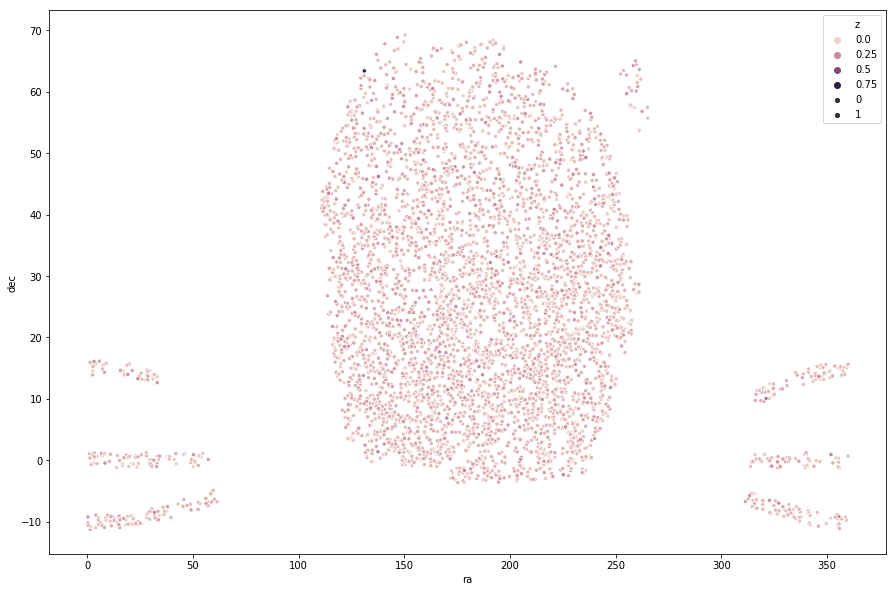

In [43]:
f = plt.figure(figsize=(15,10))
ax = f.add_subplot(111)

seaborn.scatterplot(x='ra',y='dec',data=df,hue='z',size=1,ax=ax)

**NOTA**     
**a)** En este gráfico podemos observar la distribución en el cielo de las galaxias, y podemos apreciar si están distribuidas de forma uniforme respecto de las distancias o no.    

eje y (dec)= Declinación medida en grados   
eje x (ra)= asención medida en grados   
z (redshift)= distancia   


Text(0.5,1,'Distribución de galaxias según PetroMag')

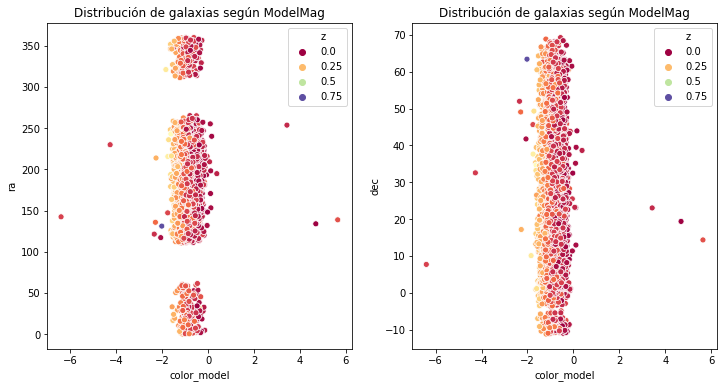

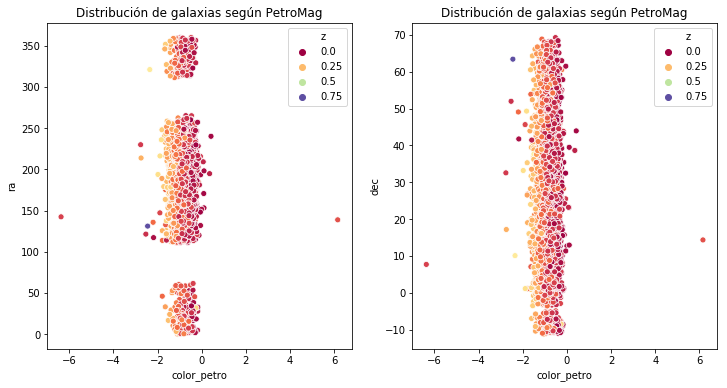

In [74]:
# distribución de galaxias según el color
# (banda r) - (banda g) = color

# ModelMag
data['color_model'] = data['modelMag_r'] - data['modelMag_g']

plt.figure (figsize=(12,6))

plt.subplot(121)
plt1=seaborn.scatterplot(data=data, x='color_model', y='ra', hue='z', palette='Spectral')
plt.title('Distribución de galaxias según ModelMag')

plt.subplot(122)
plt2=seaborn.scatterplot(data=data, x='color_model', y='dec',hue='z', palette='Spectral')
plt.title('Distribución de galaxias según ModelMag')

# PetroMag
data['color_petro'] = data['petroMag_r'] - data['petroMag_g']

plt.figure (figsize=(12,6))

plt.subplot(121)
plt1=seaborn.scatterplot(data=data, x='color_petro', y='ra', hue='z', palette='Spectral')
plt.title('Distribución de galaxias según PetroMag')

plt.subplot(122)
plt2=seaborn.scatterplot(data=data, x='color_petro', y='dec',hue='z', palette='Spectral')
plt.title('Distribución de galaxias según PetroMag')

**NOTAS:**    
**a)** La distribución de galaxias calcualda teniendo en cuenta la diferencia entre las bandas r y g para los métoso ModelMag y PetroMag es muy similar. Por lo que la información de brillo calculada por ambos métodos en esta instancia no se diferenciaría.

## 2.2) Considerando una "rebanada" sobre el plano celeste, grafiquen la distribución de galaxias considerando el corrimiento al rojo como la distancia.

In [17]:
# Tomamos una rebanada

slice_dec = [30,40]
dataset_cut = data
dataset_cut['intervals'] = pd.cut(data['dec'],slice_dec)
dataset_sliced = dataset_cut[dataset_cut['intervals'] == pd.Interval(slice_dec[0],slice_dec[1])]

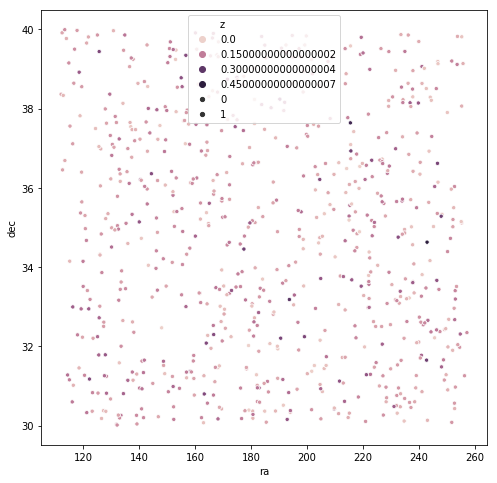

In [75]:
# Realizamos el gráfico de distribución de galaxias utilizando la rebanada calculada anteriormente

f = plt.figure(figsize=(8,8))
ax = f.add_subplot(111)
sns.scatterplot(x='ra',y='dec',data=dataset_sliced,hue='z',size=1,ax=ax)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]),
 <a list of 30 Text xticklabel objects>)

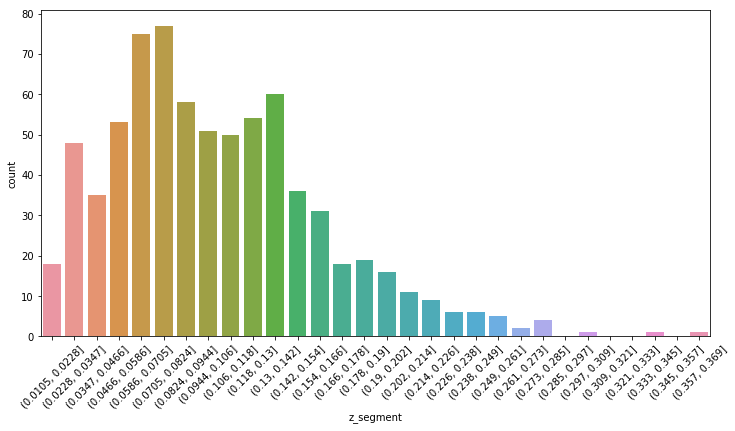

In [76]:
# Obtenemos la distribución de las galxias en z de la rebanada

dataset_sliced['z_segment'] = pd.cut(dataset_sliced['z'],30)
f = plt.figure(figsize=(12,6))
ax = f.add_subplot(111)
sns.countplot(data=dataset_sliced, x='z_segment')
plt.xticks(rotation=45)

**NOTAS:**     
**a)** Podemos observar que las galaxias en Z siguen una distribución con asimetría positiva similar a una Poisson.

In [83]:
# Obtenemos la distribución de galaxias de la rebanada según ra (coordenadas ecuatoriales, sistema J2000)

dataset_sliced['ra_segment'] = pd.cut(dataset_sliced['ra'],range(0,360,6))

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58]),
 <a list of 59 Text xticklabel objects>)

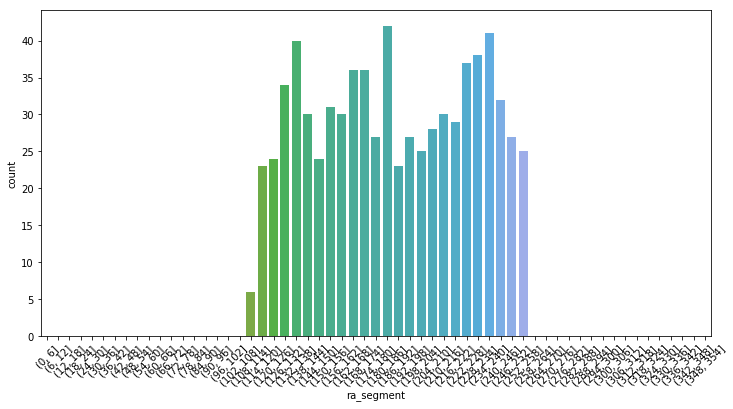

In [84]:
plt1 = plt.figure(figsize=(12,6))
ax = f.add_subplot(111)
sns.countplot(data=dataset_sliced, x='ra_segment')
plt.xticks(rotation=45)

In [85]:
dataset_sliced['dec_segment'] = pd.cut(dataset_sliced['dec'],range(0,360,6))

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58]),
 <a list of 59 Text xticklabel objects>)

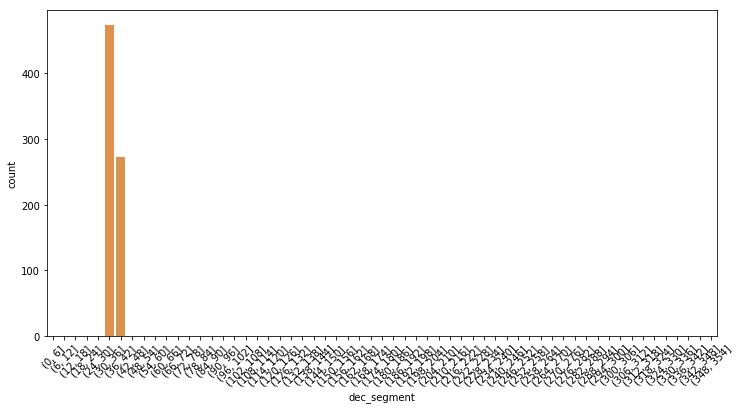

In [86]:
plt2 = plt.figure(figsize=(12,6))
ax = f.add_subplot(111)
sns.countplot(data=dataset_sliced, x='dec_segment')
plt.xticks(rotation=45)

 ## *2.3) Cómo son las distribuciones de las magnitudes de las galaxias en las diferentes bandas?

 ## 2.4) Cuál es la distribución del corrimiento al rojo de las galaxias?

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]),
 <a list of 30 Text xticklabel objects>)

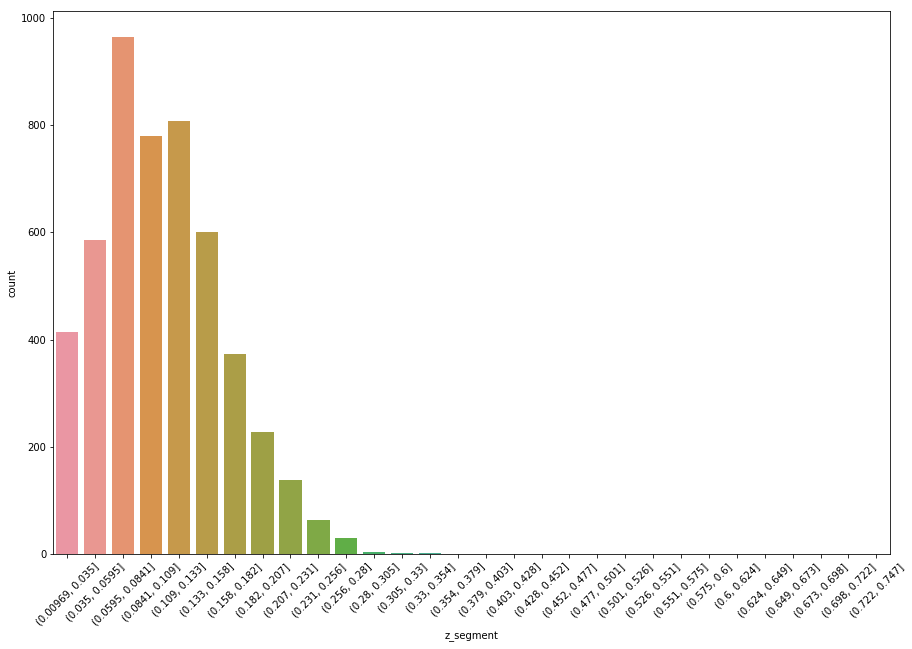

In [22]:
data['z_segment'] = pd.cut(data['z'],30)
f = plt.figure(figsize=(15,10))
ax = f.add_subplot(111)
sns.countplot(data=data, x='z_segment')
plt.xticks(rotation=45)

 ## 2.5) Existe correlación entre las diferentes variables?

In [ ]:
correlacion entre todas las variables

 ## 2.6) Realicen gráficos boxplot para identificar outliers.

In [ ]:
redshift
magnitudes
radios

## 2.7) Utilizando las magnitudes es posible construir índices colores, por ejemplo u-g o g-r. Analicen la distribución de algunos de estos índices. Se observa algo en particular?

In [23]:
# restamos petroMag_u - petroMag_g = indice de color

# restamos g-r


# scatterplor magnitud-color

## 2.8) Analice si exite alguna relación entre algún índice de color y el tipo morfológico. Pueden ajustar las distribuciones de color para cada tipo morfológico con una función normal y ver si encuentran diferencias.

 ## 2.9) Mostrar si los valores de las medianas de las distribuciones de z para cada clase (E,S e I) son estadśticamente diferentes.

In [ ]:
scipy - test de medianas